In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import gc

from sklearn import set_config
from sklearn.base import clone
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
#from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data\Times_Series_Project_uoc.xlsx


Data loading

In [8]:
PATH_FILE = 'C:/Users/tomas/Documents/GitHub/Adaptative_Ensemble_methods_for_time_series_forecast/data/Times_Series_Project_uoc.xlsx'

Others_Europe = pd.read_excel(PATH_FILE, 'Others_Europe')
Continental_Europe2 = pd.read_excel(PATH_FILE, 'Continental_Europe2')
Continental_Europe = pd.read_excel(PATH_FILE, 'Continental_Europe')
Latam = pd.read_excel(PATH_FILE, 'Latam')
Central_Europe = pd.read_excel(PATH_FILE, 'Central_Europe')
Asia = pd.read_excel(PATH_FILE, 'Asia')

Let's see some rows

In [10]:
Central_Europe.head(10)

,date,sales_A,sales_B,sales_C,sales_D,sales_F,sales_G,sales_H,sales_I,sales_J,...,pollution_Toulon_o3,pollution_Toulon_pm10,pollution_Toulon_pm25,pollution_Toulouse_no2,pollution_Toulouse_o3,pollution_Toulouse_pm10,pollution_Toulouse_pm25,pollution_Tours_no2,pollution_Tours_pm10,pollution_Tours_pm25
0,2020-01-06,996.020157,396.361426,400.369333,343.086923,737.453537,827.530467,1546.465983,214.741422,773.484420,...,11.085714,25.142857,78.285714,11.914286,12.628571,18.857143,58.142857,7.700000,15.857143,48.428571
1,2020-01-13,900.380432,335.761344,346.119396,304.038936,630.007515,734.869187,1453.052290,188.428871,694.034924,...,9.600000,24.000000,66.000000,16.514286,9.900000,24.285714,65.857143,7.342857,13.857143,44.000000
2,2020-01-20,1004.608188,383.579417,394.036186,338.101487,730.864865,802.531258,1667.670194,203.434431,775.554370,...,22.485714,15.714286,35.857143,12.271429,21.685714,16.000000,43.428571,6.185714,14.285714,35.428571
3,2020-01-27,1146.424578,419.077745,441.514091,373.951329,813.314869,887.459661,1919.294839,241.151527,853.101487,...,26.957143,17.571429,37.750000,14.271429,17.342857,24.571429,50.857143,10.671429,27.285714,70.000000
4,2020-02-03,1199.356300,421.990478,451.744175,381.100111,840.845888,912.569522,1908.543473,245.173158,881.639007,...,18.528571,19.000000,31.285714,16.128571,9.514286,18.857143,42.571429,4.142857,10.142857,23.000000
5,2020-02-10,1189.730780,413.181604,461.376826,369.054385,814.398956,879.749295,1601.040402,237.627062,841.320578,...,24.014286,19.285714,27.857143,10.342857,22.900000,15.571429,32.857143,6.057143,17.000000,38.714286
6,2020-02-17,1125.289879,381.835526,394.838547,323.238554,691.037601,744.959797,1379.128260,193.913677,782.174802,...,25.114286,17.857143,27.428571,10.342857,23.928571,18.857143,41.571429,4.957143,16.428571,33.000000
7,2020-02-24,1133.188243,405.272383,402.016373,323.141608,698.417492,767.337665,1604.174336,197.674883,814.583452,...,26.114286,17.428571,28.428571,17.585714,11.700000,22.571429,58.142857,6.000000,12.857143,27.428571
8,2020-03-02,1049.896641,401.414682,436.972530,352.546107,804.483898,877.976799,1839.456970,218.965701,829.860522,...,28.028571,15.142857,27.000000,7.442857,24.871429,12.285714,30.714286,3.942857,11.428571,26.428571
9,2020-03-09,1156.534034,442.606817,467.956408,403.323449,920.645212,964.955453,2299.747863,244.119475,934.576499,...,30.871429,9.714286,16.142857,7.814286,23.428571,8.571429,21.571429,5.400000,12.571429,31.142857


In [17]:
print('We have ', Central_Europe.shape[0], ' rows and ', Central_Europe.shape[1], 'columns in the Central_Europe Dataset.')
print('We have ', Others_Europe.shape[0], ' rows and ', Others_Europe.shape[1], 'columns in the Others_Europe Dataset.')
print('We have ', Continental_Europe.shape[0], ' rows and ', Continental_Europe.shape[1], 'columns in the Continental_Europe Dataset.')
print('We have ', Continental_Europe2.shape[0], ' rows and ', Continental_Europe2.shape[1], 'columns in the Continental_Europe2 Dataset.')
print('We have ', Latam.shape[0], ' rows and ', Latam.shape[1], 'columns in the Latam Dataset.')
print('We have ', Asia.shape[0], ' rows and ', Asia.shape[1], 'columns in the Asia Dataset.')

We have  174  rows and  150 columns in the Central_Europe Dataset.
We have  183  rows and  66 columns in the Others_Europe Dataset.
We have  186  rows and  34 columns in the Continental_Europe Dataset.
We have  186  rows and  132 columns in the Continental_Europe2 Dataset.
We have  189  rows and  111 columns in the Latam Dataset.
We have  174  rows and  221 columns in the Asia Dataset.


Let's see number on NAs by column in the numerical ones

In [21]:
na_count = Central_Europe.isna().sum()

columns_with_na = na_count[na_count > 0]

print(columns_with_na)

date                       2
humidity_avg_Ajaccio       2
humidity_avg_Bordeaux      2
humidity_avg_Dijon         2
humidity_avg_Lille         2
                          ..
pollution_Toulouse_pm10    2
pollution_Toulouse_pm25    2
pollution_Tours_no2        2
pollution_Tours_pm10       2
pollution_Tours_pm25       2
Length: 138, dtype: int64


* im

Histogram of: sales_A 



<AxesSubplot:>

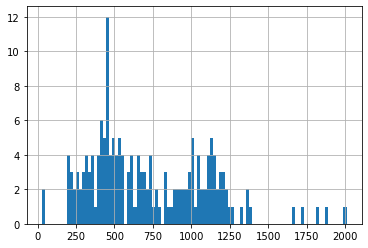

Histogram of: sales_B 



<AxesSubplot:>

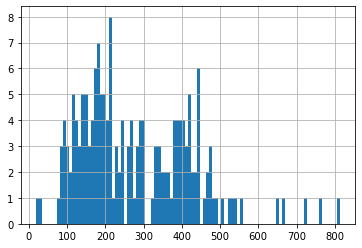

Histogram of: sales_C 



<AxesSubplot:>

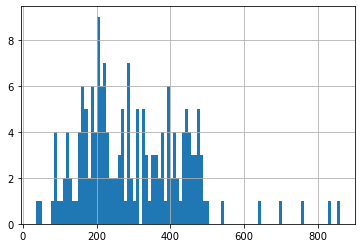

Histogram of: sales_D 



<AxesSubplot:>

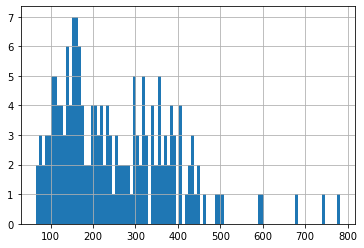

Histogram of: sales_F 



<AxesSubplot:>

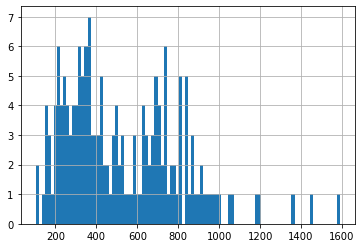

Histogram of: sales_G 



<AxesSubplot:>

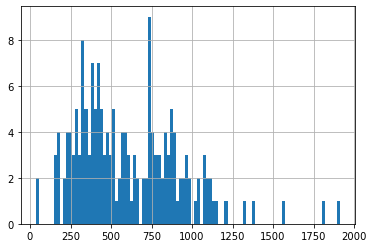

Histogram of: sales_H 



<AxesSubplot:>

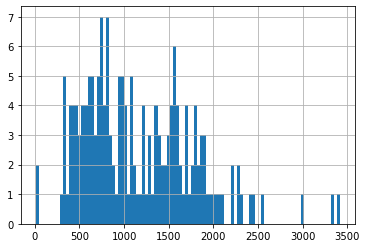

Histogram of: sales_I 



<AxesSubplot:>

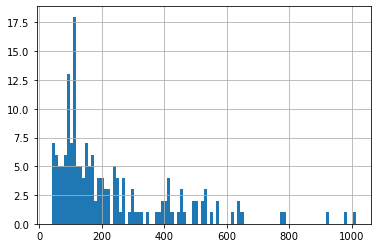

Histogram of: sales_J 



<AxesSubplot:>

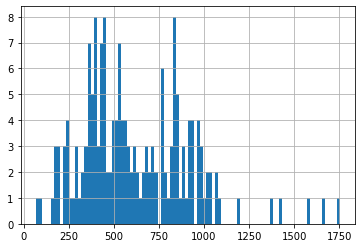

Histogram of: sales_L 



<AxesSubplot:>

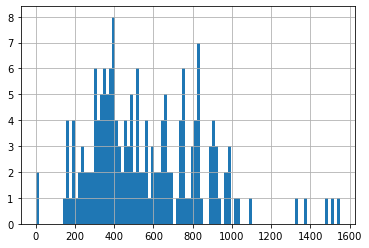

Histogram of: sales_K 



<AxesSubplot:>

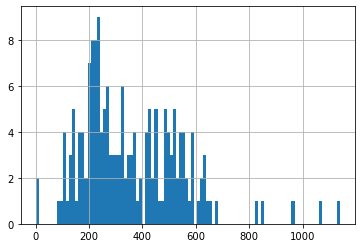

Histogram of: sales_M 



<AxesSubplot:>

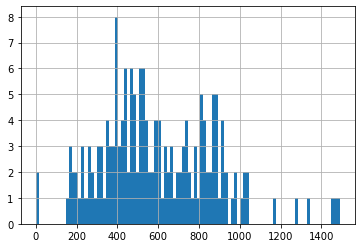

Histogram of: humidity_avg_Ajaccio 



<AxesSubplot:>

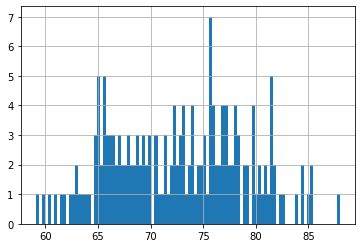

Histogram of: humidity_avg_Bordeaux 



<AxesSubplot:>

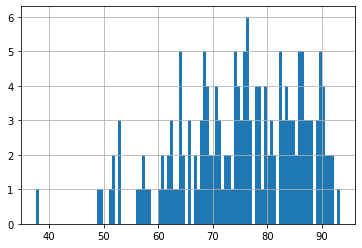

Histogram of: humidity_avg_Dijon 



<AxesSubplot:>

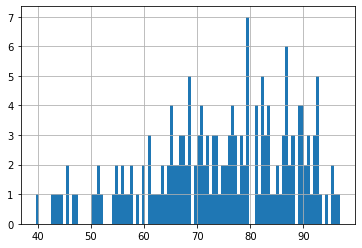

Histogram of: humidity_avg_Lille 



<AxesSubplot:>

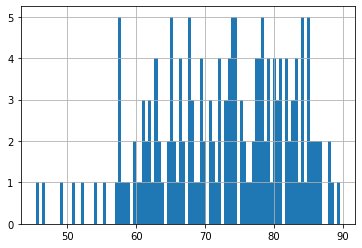

Histogram of: humidity_avg_Lyon 



<AxesSubplot:>

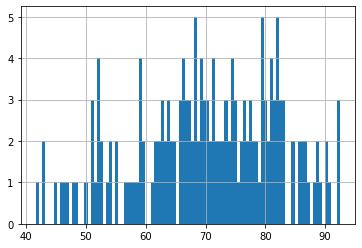

Histogram of: humidity_avg_Marseille 



<AxesSubplot:>

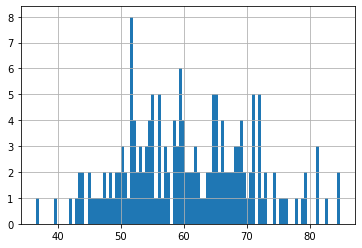

Histogram of: humidity_avg_Nantes 



<AxesSubplot:>

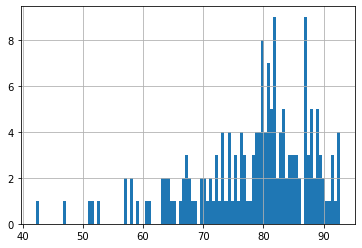

Histogram of: humidity_avg_Orleans 



<AxesSubplot:>

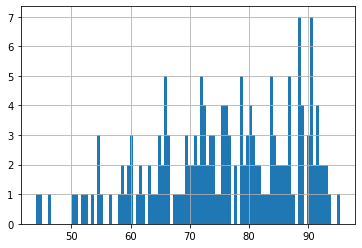

Histogram of: humidity_avg_Paris 



<AxesSubplot:>

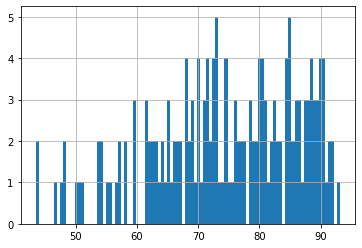

Histogram of: humidity_avg_Rennes 



<AxesSubplot:>

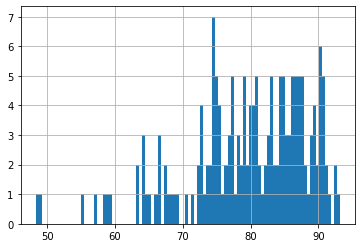

Histogram of: humidity_avg_Rouen 



<AxesSubplot:>

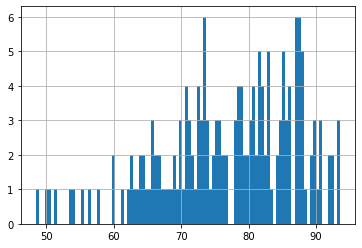

Histogram of: humidity_avg_Strasbourg 



<AxesSubplot:>

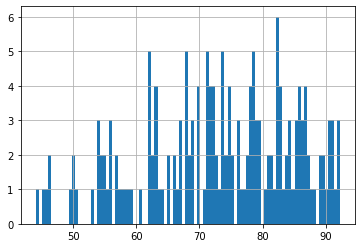

Histogram of: humidity_avg_Toulouse 



<AxesSubplot:>

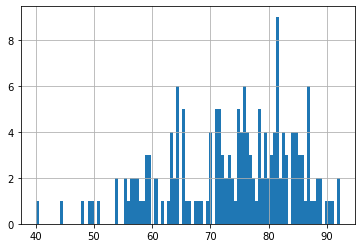

Histogram of: temp_avg_k_Ajaccio 



<AxesSubplot:>

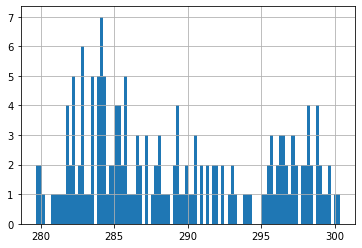

Histogram of: temp_avg_k_Bordeaux 



<AxesSubplot:>

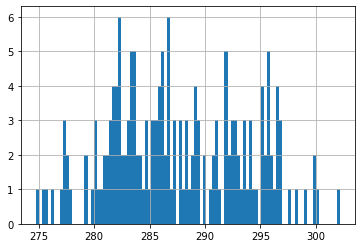

Histogram of: temp_avg_k_Dijon 



<AxesSubplot:>

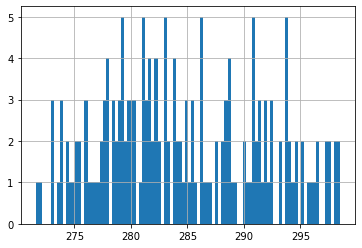

Histogram of: temp_avg_k_Lille 



<AxesSubplot:>

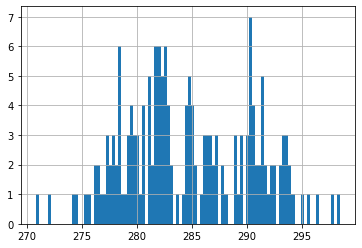

Histogram of: temp_avg_k_Lyon 



<AxesSubplot:>

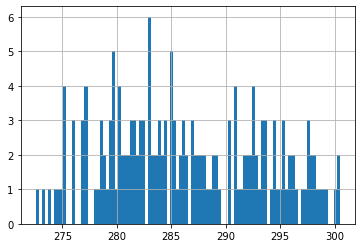

Histogram of: temp_avg_k_Marseille 



<AxesSubplot:>

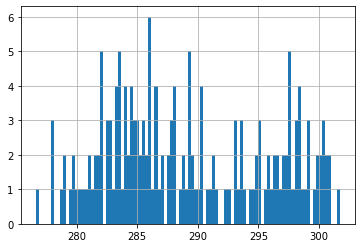

Histogram of: temp_avg_k_Nantes 



<AxesSubplot:>

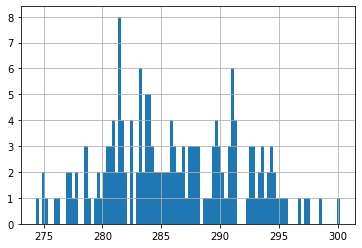

Histogram of: temp_avg_k_Orleans 



<AxesSubplot:>

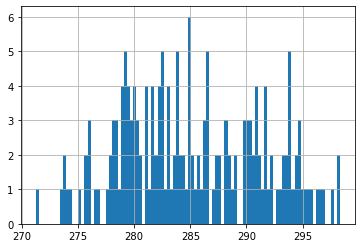

Histogram of: temp_avg_k_Paris 



<AxesSubplot:>

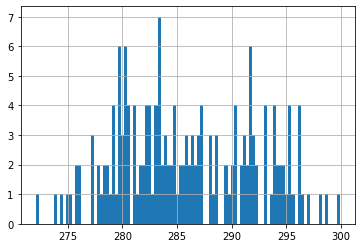

Histogram of: temp_avg_k_Rennes 



<AxesSubplot:>

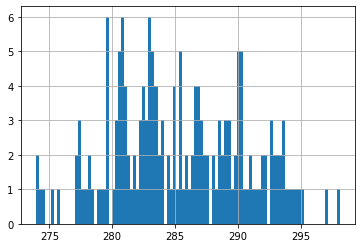

Histogram of: temp_avg_k_Rouen 



<AxesSubplot:>

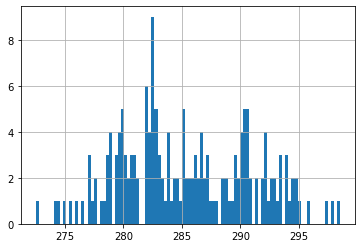

Histogram of: temp_avg_k_Strasbourg 



<AxesSubplot:>

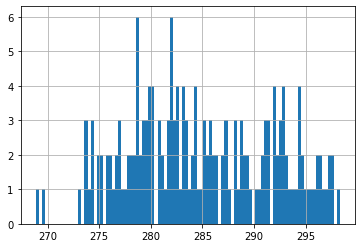

Histogram of: temp_avg_k_Toulouse 



<AxesSubplot:>

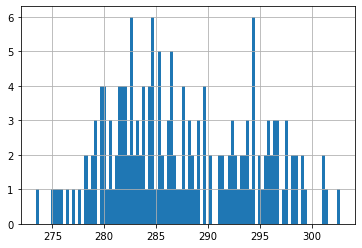

Histogram of: gtrends_FR_Gorge qui gratte 



<AxesSubplot:>

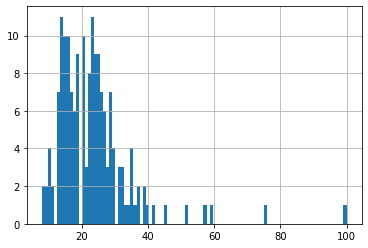

Histogram of: gtrends_FR_Lysopaine 



<AxesSubplot:>

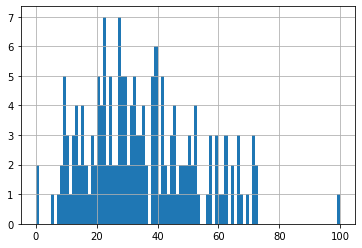

Histogram of: gtrends_FR_Mal de gorge 



<AxesSubplot:>

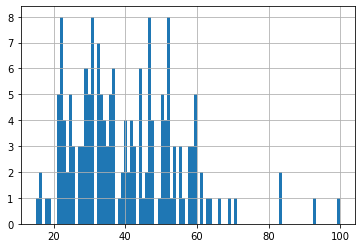

Histogram of: gtrends_FR-A_Gorge qui gratte 



<AxesSubplot:>

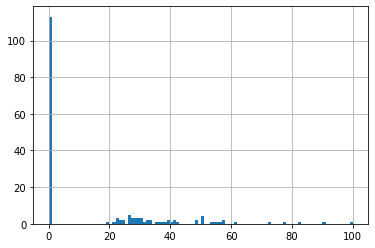

Histogram of: gtrends_FR-A_Lysopaine 



<AxesSubplot:>

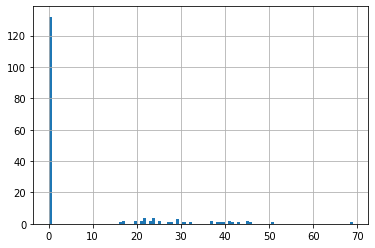

Histogram of: gtrends_FR-A_Mal de gorge 



<AxesSubplot:>

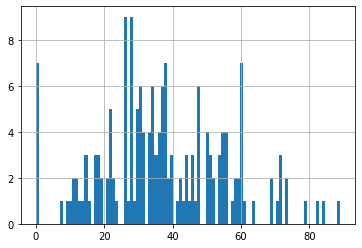

Histogram of: gtrends_FR-B_Gorge qui gratte 



<AxesSubplot:>

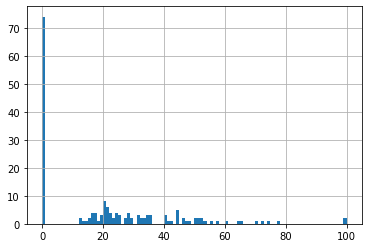

Histogram of: gtrends_FR-B_Lysopaine 



<AxesSubplot:>

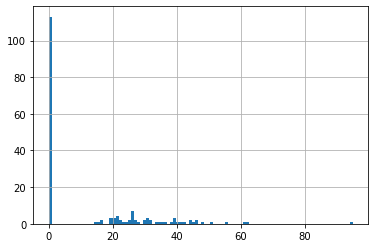

Histogram of: gtrends_FR-B_Mal de gorge 



<AxesSubplot:>

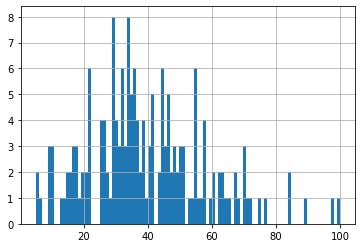

Histogram of: gtrends_FR-C_Gorge qui gratte 



<AxesSubplot:>

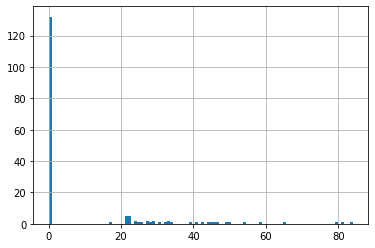

Histogram of: gtrends_FR-C_Lysopaine 



<AxesSubplot:>

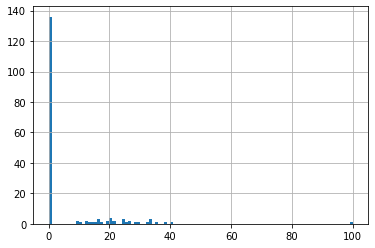

Histogram of: gtrends_FR-C_Mal de gorge 



<AxesSubplot:>

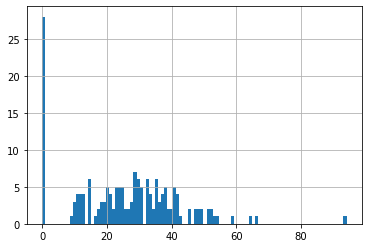

Histogram of: gtrends_FR-D_Gorge qui gratte 



<AxesSubplot:>

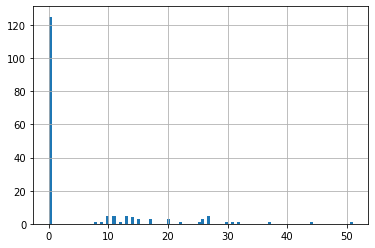

Histogram of: gtrends_FR-D_Lysopaine 



<AxesSubplot:>

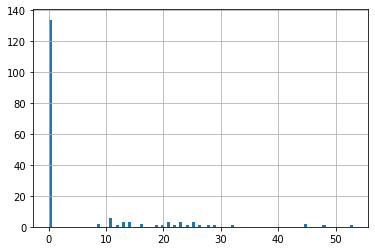

Histogram of: gtrends_FR-D_Mal de gorge 



<AxesSubplot:>

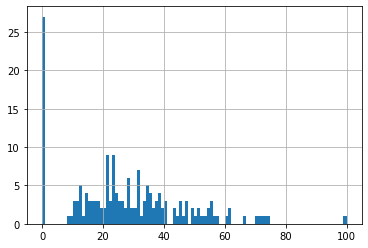

Histogram of: gtrends_FR-F_Gorge qui gratte 



<AxesSubplot:>

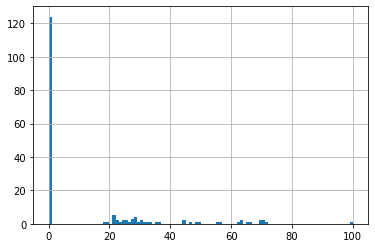

Histogram of: gtrends_FR-F_Lysopaine 



<AxesSubplot:>

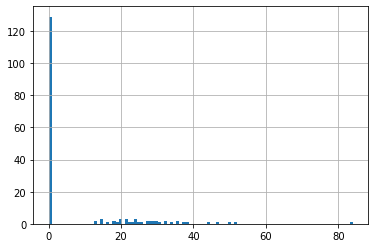

Histogram of: gtrends_FR-F_Mal de gorge 



<AxesSubplot:>

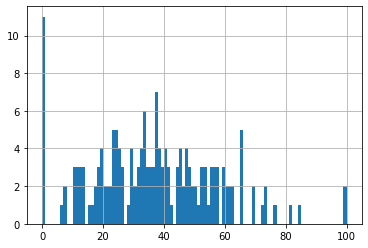

Histogram of: gtrends_FR-G_Gorge qui gratte 



<AxesSubplot:>

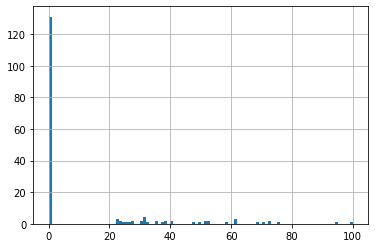

Histogram of: gtrends_FR-G_Lysopaine 



<AxesSubplot:>

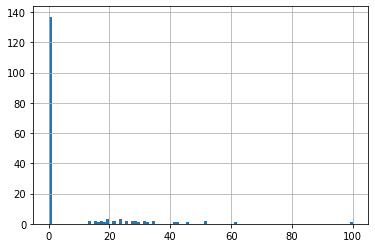

Histogram of: gtrends_FR-G_Mal de gorge 



<AxesSubplot:>

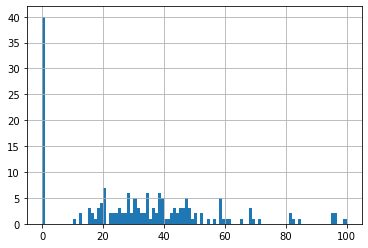

Histogram of: gtrends_FR-H_Gorge qui gratte 



<AxesSubplot:>

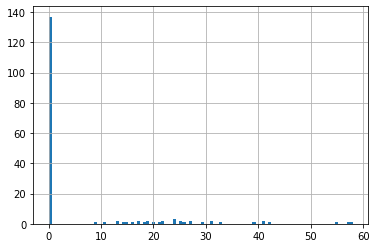

Histogram of: gtrends_FR-H_Lysopaine 



<AxesSubplot:>

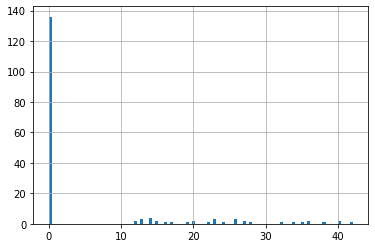

Histogram of: gtrends_FR-H_Mal de gorge 



<AxesSubplot:>

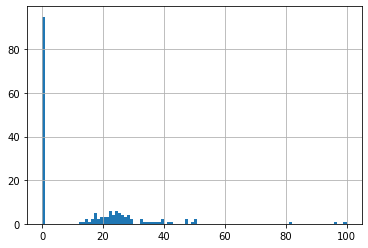

Histogram of: gtrends_FR-I_Gorge qui gratte 



<AxesSubplot:>

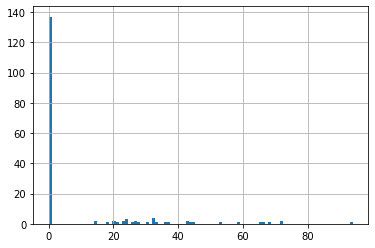

Histogram of: gtrends_FR-I_Lysopaine 



<AxesSubplot:>

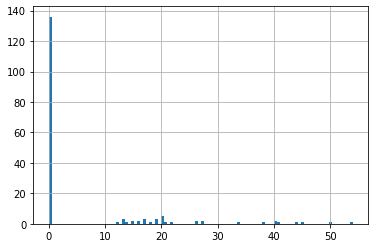

Histogram of: gtrends_FR-I_Mal de gorge 



<AxesSubplot:>

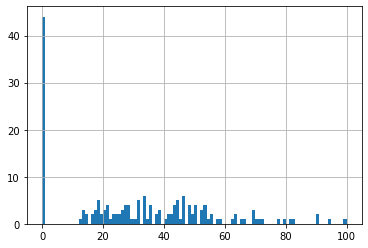

Histogram of: gtrends_FR-J_Gorge qui gratte 



<AxesSubplot:>

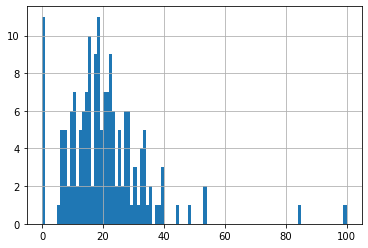

Histogram of: gtrends_FR-J_Lysopaine 



<AxesSubplot:>

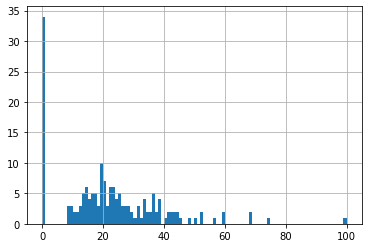

Histogram of: gtrends_FR-J_Mal de gorge 



<AxesSubplot:>

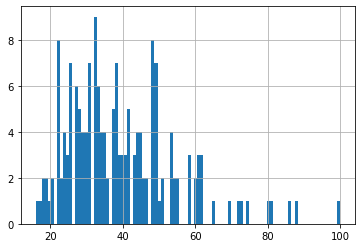

Histogram of: gtrends_FR-K_Gorge qui gratte 



<AxesSubplot:>

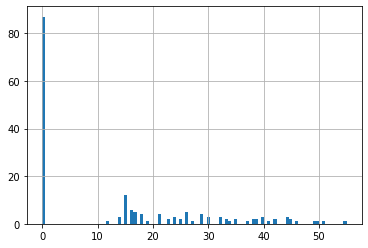

Histogram of: gtrends_FR-K_Lysopaine 



<AxesSubplot:>

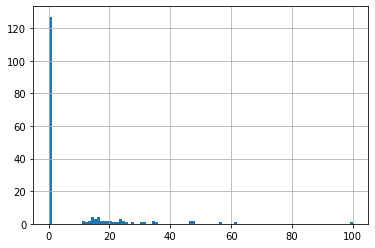

Histogram of: gtrends_FR-K_Mal de gorge 



<AxesSubplot:>

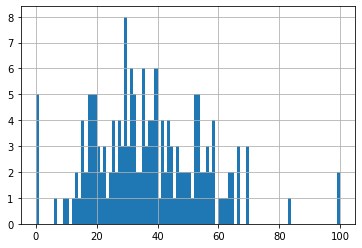

Histogram of: gtrends_FR-L_Gorge qui gratte 



<AxesSubplot:>

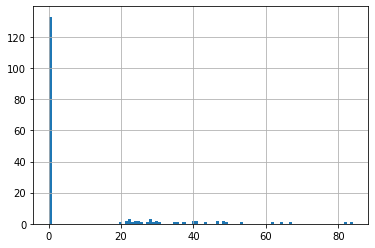

Histogram of: gtrends_FR-L_Lysopaine 



<AxesSubplot:>

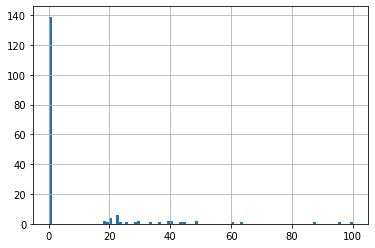

Histogram of: gtrends_FR-L_Mal de gorge 



<AxesSubplot:>

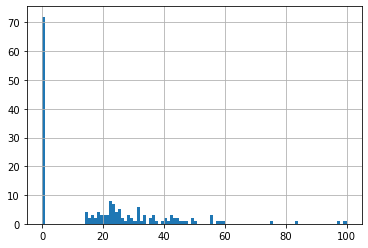

Histogram of: gtrends_FR-M_Gorge qui gratte 



<AxesSubplot:>

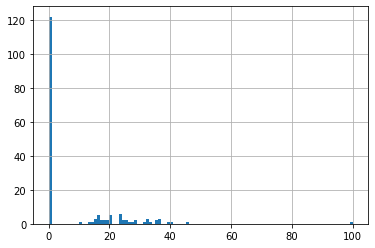

Histogram of: gtrends_FR-M_Lysopaine 



<AxesSubplot:>

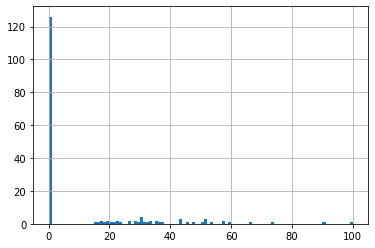

Histogram of: gtrends_FR-M_Mal de gorge 



<AxesSubplot:>

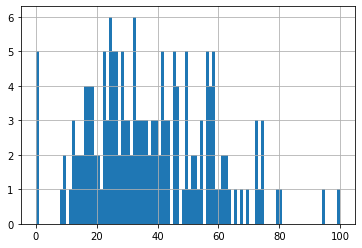

Histogram of: influenza 



<AxesSubplot:>

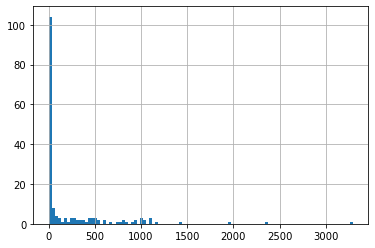

Histogram of: pollution_Bordeaux_no2 



<AxesSubplot:>

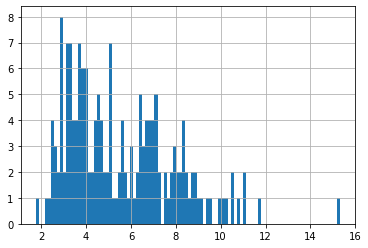

Histogram of: pollution_Bordeaux_o3 



<AxesSubplot:>

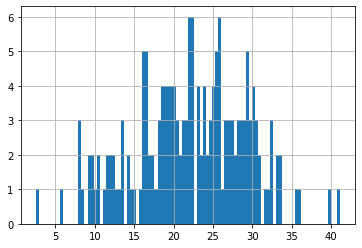

Histogram of: pollution_Bordeaux_pm10 



<AxesSubplot:>

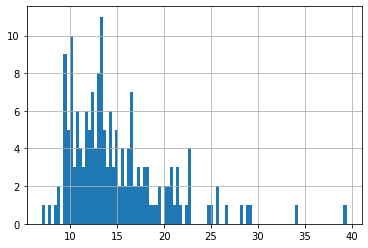

Histogram of: pollution_Bordeaux_pm25 



<AxesSubplot:>

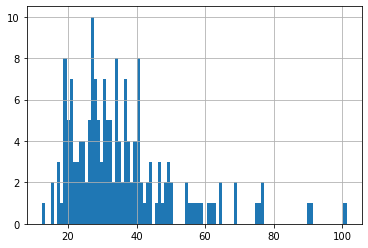

Histogram of: pollution_Bordeaux_so2 



<AxesSubplot:>

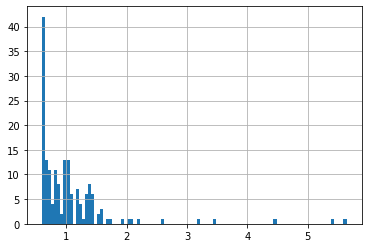

Histogram of: pollution_Caen_no2 



<AxesSubplot:>

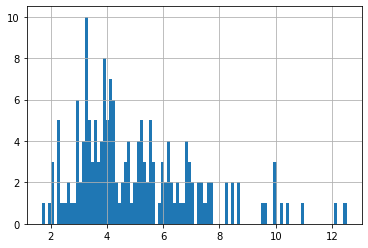

Histogram of: pollution_Caen_o3 



<AxesSubplot:>

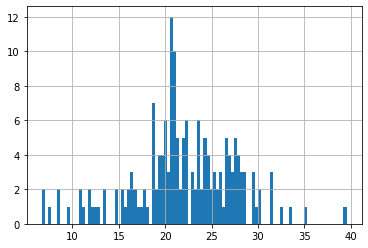

Histogram of: pollution_Caen_pm10 



<AxesSubplot:>

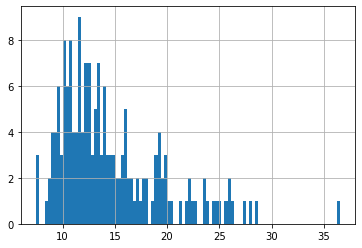

Histogram of: pollution_Caen_pm25 



<AxesSubplot:>

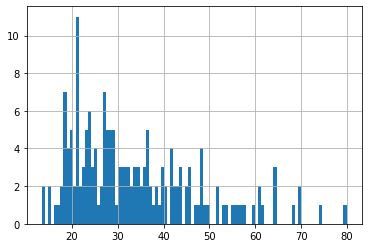

Histogram of: pollution_Clermont-Ferrand_o3 



<AxesSubplot:>

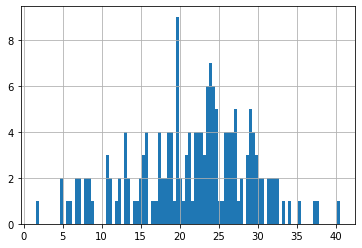

Histogram of: pollution_Clermont-Ferrand_pm25 



<AxesSubplot:>

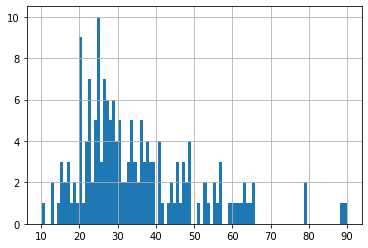

Histogram of: pollution_Grenoble_o3 



<AxesSubplot:>

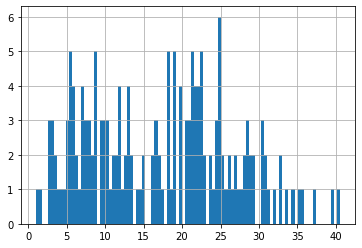

Histogram of: pollution_Grenoble_pm25 



<AxesSubplot:>

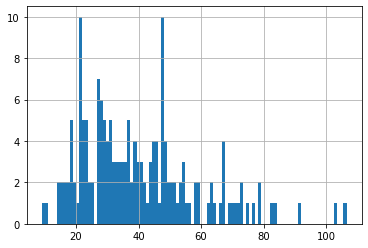

Histogram of: pollution_Limoges_no2 



<AxesSubplot:>

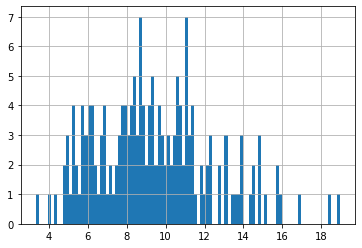

Histogram of: pollution_Limoges_o3 



<AxesSubplot:>

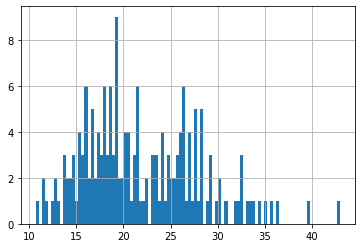

Histogram of: pollution_Limoges_pm10 



<AxesSubplot:>

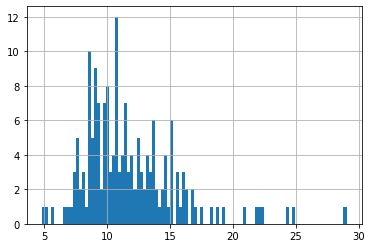

Histogram of: pollution_Lyon_o3 



<AxesSubplot:>

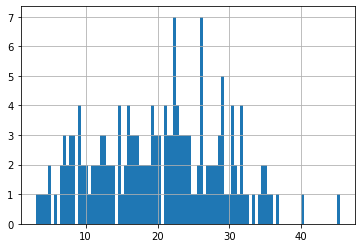

Histogram of: pollution_Lyon_pm25 



<AxesSubplot:>

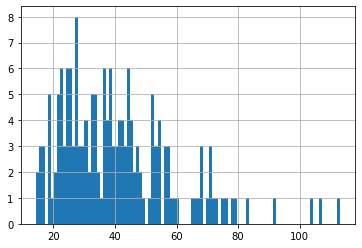

Histogram of: pollution_Marseille_no2 



<AxesSubplot:>

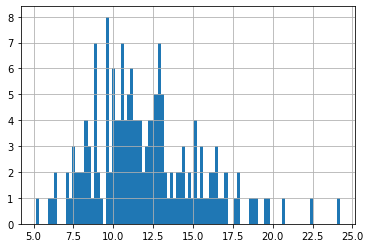

Histogram of: pollution_Marseille_o3 



<AxesSubplot:>

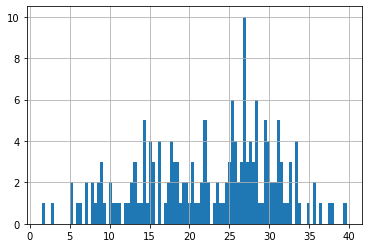

Histogram of: pollution_Marseille_pm10 



<AxesSubplot:>

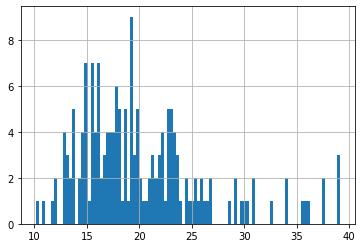

Histogram of: pollution_Marseille_pm25 



<AxesSubplot:>

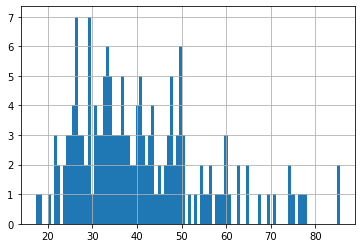

Histogram of: pollution_Marseille_so2 



<AxesSubplot:>

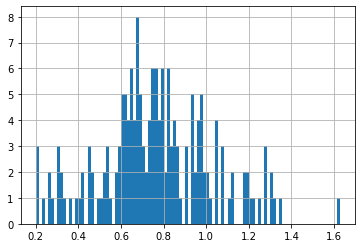

Histogram of: pollution_Montpellier_no2 



<AxesSubplot:>

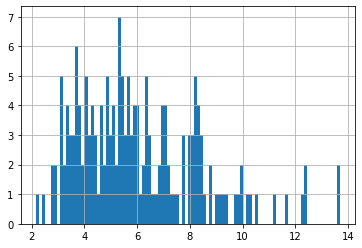

Histogram of: pollution_Montpellier_o3 



<AxesSubplot:>

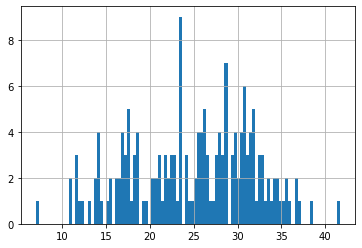

Histogram of: pollution_Montpellier_pm10 



<AxesSubplot:>

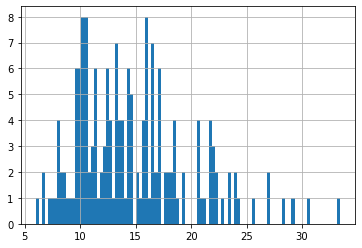

Histogram of: pollution_Montpellier_pm25 



<AxesSubplot:>

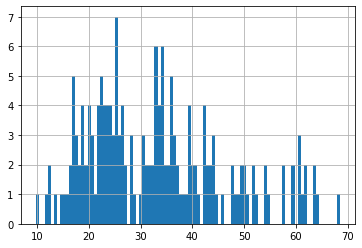

Histogram of: pollution_Nantes_no2 



<AxesSubplot:>

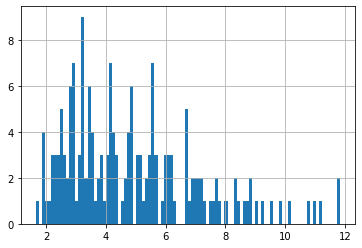

Histogram of: pollution_Nantes_o3 



<AxesSubplot:>

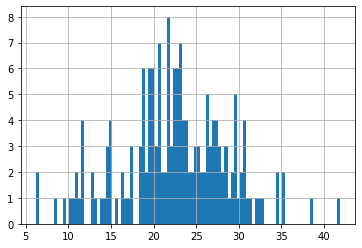

Histogram of: pollution_Nantes_pm10 



<AxesSubplot:>

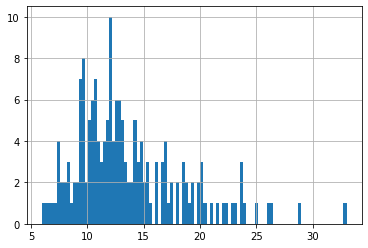

Histogram of: pollution_Nantes_pm25 



<AxesSubplot:>

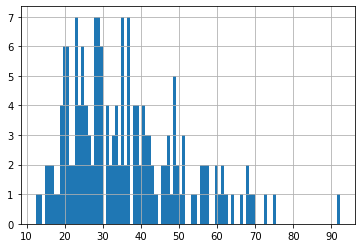

Histogram of: pollution_Nice_no2 



<AxesSubplot:>

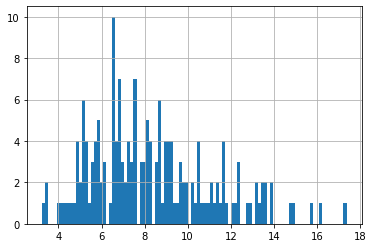

Histogram of: pollution_Nice_o3 



<AxesSubplot:>

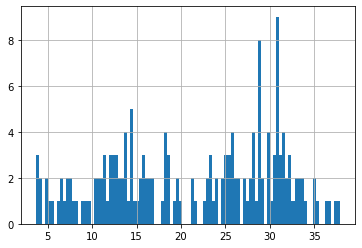

Histogram of: pollution_Nice_pm10 



<AxesSubplot:>

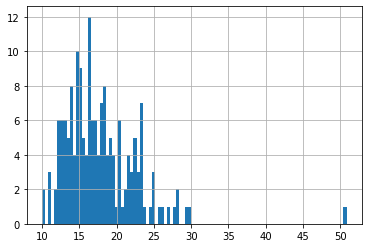

Histogram of: pollution_Nice_pm25 



<AxesSubplot:>

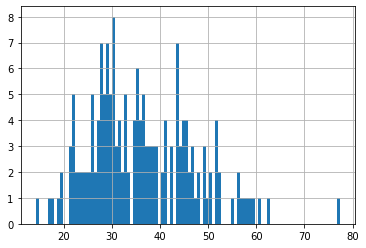

Histogram of: pollution_NÃ®mes_no2 



<AxesSubplot:>

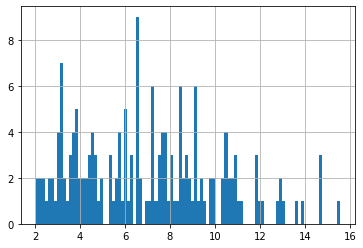

Histogram of: pollution_NÃ®mes_o3 



<AxesSubplot:>

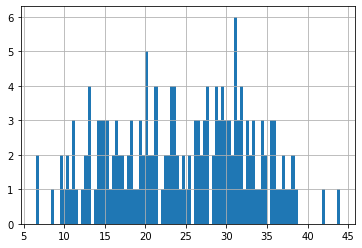

Histogram of: pollution_NÃ®mes_pm10 



<AxesSubplot:>

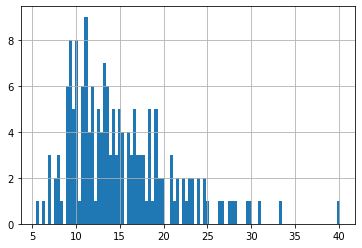

Histogram of: pollution_NÃ®mes_pm25 



<AxesSubplot:>

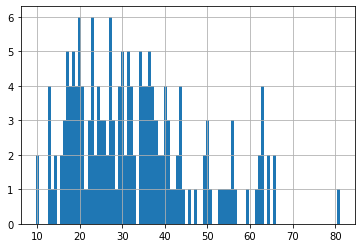

Histogram of: pollution_OrlÃ©ans_no2 



<AxesSubplot:>

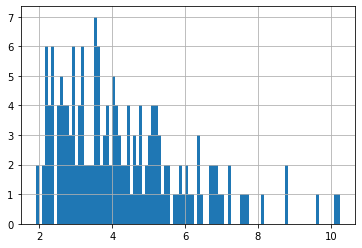

Histogram of: pollution_OrlÃ©ans_o3 



<AxesSubplot:>

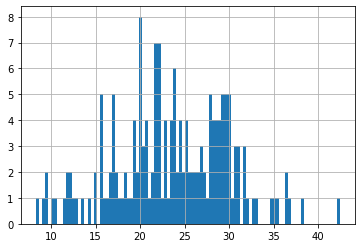

Histogram of: pollution_OrlÃ©ans_pm10 



<AxesSubplot:>

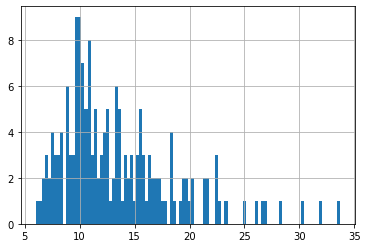

Histogram of: pollution_OrlÃ©ans_pm25 



<AxesSubplot:>

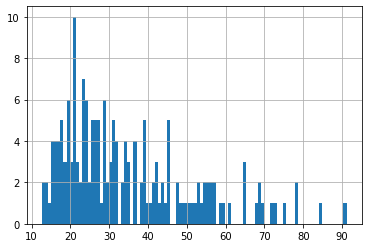

Histogram of: pollution_Paris_no2 



<AxesSubplot:>

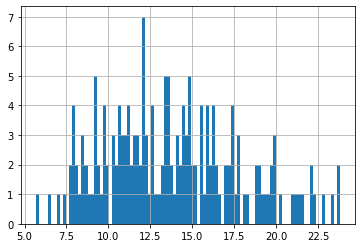

Histogram of: pollution_Paris_o3 



<AxesSubplot:>

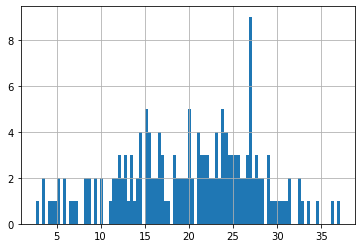

Histogram of: pollution_Paris_pm10 



<AxesSubplot:>

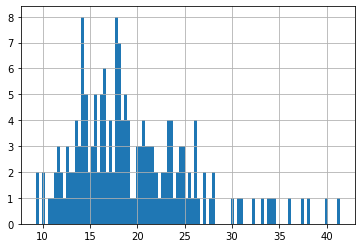

Histogram of: pollution_Paris_pm25 



<AxesSubplot:>

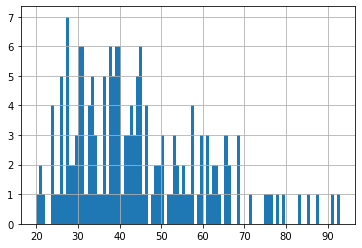

Histogram of: pollution_Perpignan_no2 



<AxesSubplot:>

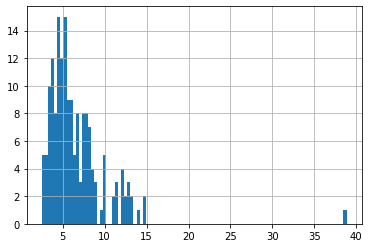

Histogram of: pollution_Perpignan_o3 



<AxesSubplot:>

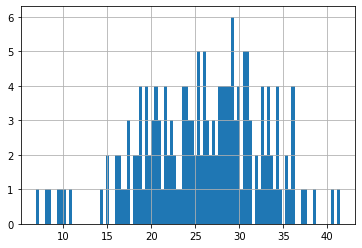

Histogram of: pollution_Perpignan_pm10 



<AxesSubplot:>

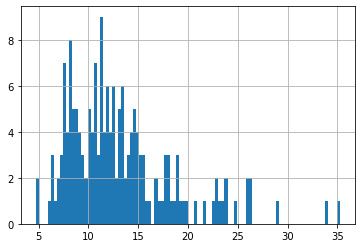

Histogram of: pollution_Perpignan_pm25 



<AxesSubplot:>

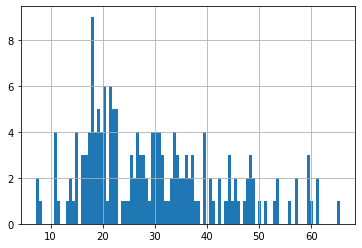

Histogram of: pollution_Rennes_no2 



<AxesSubplot:>

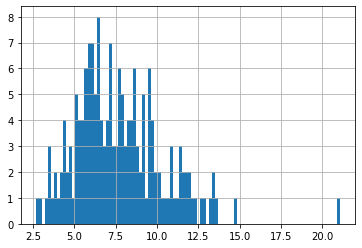

Histogram of: pollution_Rennes_pm10 



<AxesSubplot:>

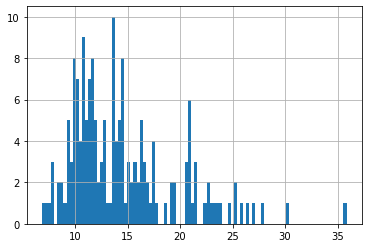

Histogram of: pollution_Rennes_pm25 



<AxesSubplot:>

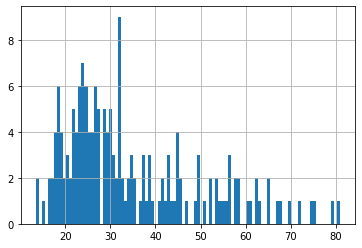

Histogram of: pollution_Rouen_no2 



<AxesSubplot:>

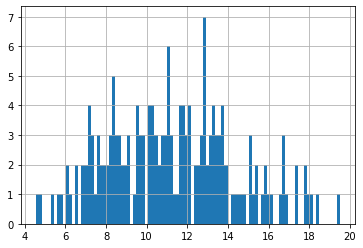

Histogram of: pollution_Rouen_o3 



<AxesSubplot:>

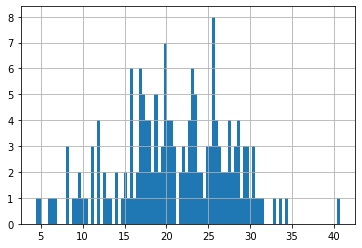

Histogram of: pollution_Rouen_pm10 



<AxesSubplot:>

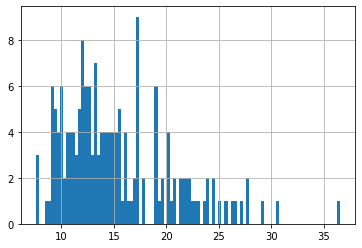

Histogram of: pollution_Rouen_pm25 



<AxesSubplot:>

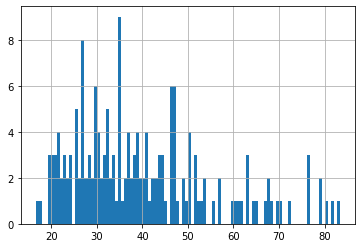

Histogram of: pollution_Saint-Ã‰tienne_o3 



<AxesSubplot:>

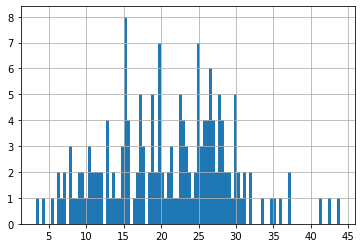

Histogram of: pollution_Saint-Ã‰tienne_pm25 



<AxesSubplot:>

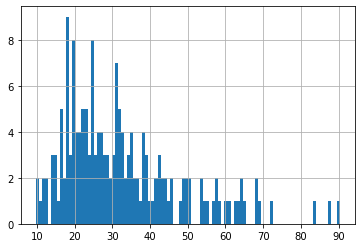

Histogram of: pollution_Toulon_no2 



<AxesSubplot:>

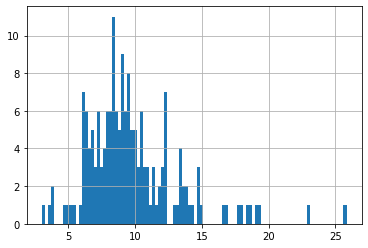

Histogram of: pollution_Toulon_o3 



<AxesSubplot:>

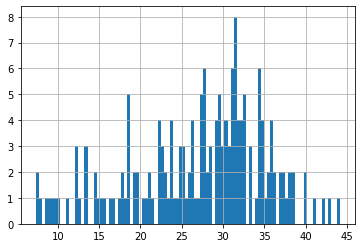

Histogram of: pollution_Toulon_pm10 



<AxesSubplot:>

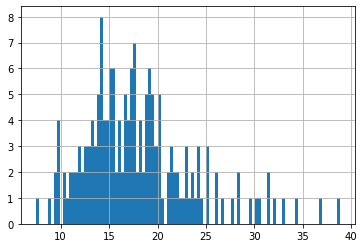

Histogram of: pollution_Toulon_pm25 



<AxesSubplot:>

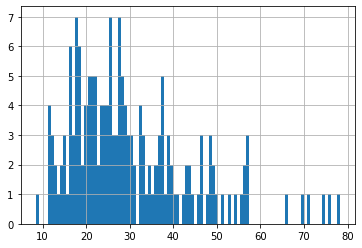

Histogram of: pollution_Toulouse_no2 



<AxesSubplot:>

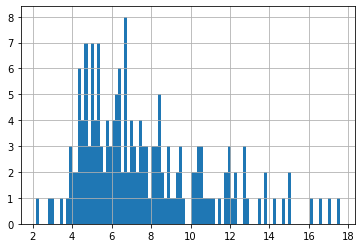

Histogram of: pollution_Toulouse_o3 



<AxesSubplot:>

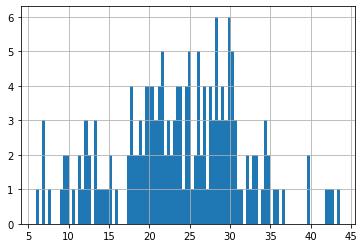

Histogram of: pollution_Toulouse_pm10 



<AxesSubplot:>

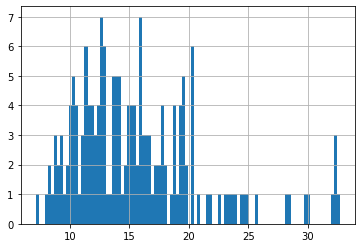

Histogram of: pollution_Toulouse_pm25 



<AxesSubplot:>

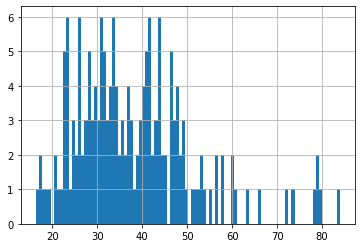

Histogram of: pollution_Tours_no2 



<AxesSubplot:>

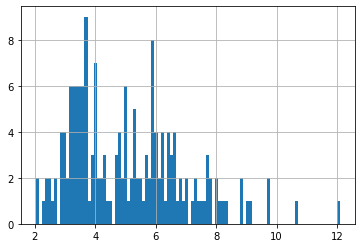

Histogram of: pollution_Tours_pm10 



<AxesSubplot:>

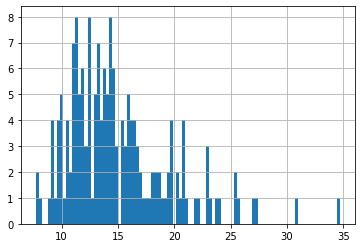

Histogram of: pollution_Tours_pm25 



<AxesSubplot:>

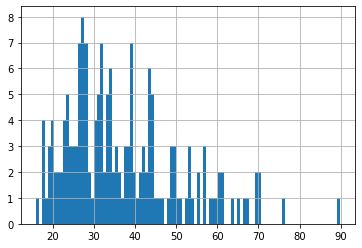

In [23]:
cols_vars = list(Central_Europe.columns)[1:]


for col in cols_vars:
    print('Histogram of:', col, '\n')
    display(Central_Europe[col].hist(bins=100))
    plt.show()

### Now we see correlation between variables, if the correlation is close to 1 or -1 we could think about dropping one variable.

<AxesSubplot:>

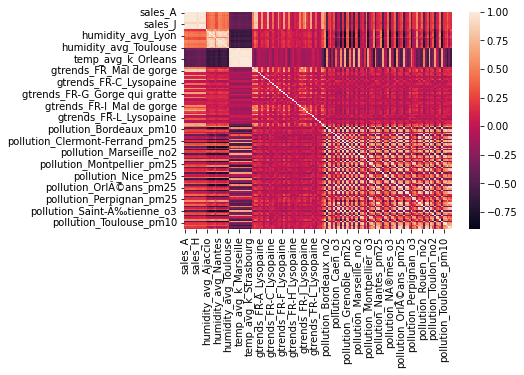

In [24]:
# calculate the correlation matrix on the numeric columns
corr = Central_Europe[cols_vars].corr()

# plot the heatmap
sns.heatmap(corr)

In [31]:
X = Central_Europe.drop(['date', 'sales_A', 'sales_B', 'sales_C', 
                         'sales_D', 'sales_F', 'sales_G', 
                         'sales_H', 'sales_I', 'sales_J', 'sales_K', 'sales_M', 'sales_L'], axis=1)  # Ajusta 'variable_objetivo' al nombre de tu variable objetivo
y = Central_Europe['sales_A']

X = X.fillna(9999999)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea un modelo de Random Forest para regresión
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros según sea necesario

# Entrena el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcula la métrica de rendimiento (en este caso, el error cuadrático medio)
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio del modelo de Random Forest: {mse:.2f}")

Error Cuadrático Medio del modelo de Random Forest: 23137.12


In [34]:
# Calcula el R cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# Número de observaciones (n) y número de predictores (p)
n = len(y_test)
p = X_test.shape[1]  # Número de características

# Calcula el R cuadrado ajustado (R² ajustado)
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"R²: {r2:.2f}")
print(f"R² Ajustado: {r2_ajustado:.2f}")

R²: 0.86
R² Ajustado: 1.05
